In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

STEP 1 : EDA & Pre-processing

In [2]:
df = pd.read_csv("cars-dataset.csv")
df.head(5)

car name  cyl   disp   hp    wt   acc  yr   mpg
0  chevrolet chevelle malibu    8  307.0  130  3504  12.0  70  18.0
1          buick skylark 320    8  350.0  165  3693  11.5  70  15.0
2         plymouth satellite    8  318.0  150  3436  11.0  70  18.0
3              amc rebel sst    8  304.0  150  3433  12.0  70  16.0
4                ford torino    8  302.0  140  3449  10.5  70  17.0

In [3]:
df.shape

(398, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [5]:
##removing all non-numeric values from the dataset
df1 = df[df.hp.apply(lambda x: x.isnumeric())]

In [6]:
df1.shape

(392, 8)

In [7]:
##checking the number of unique car names 
len(df1["car name"].unique().tolist())

301

Since the number of unique car names is large , its better to drop them as grouping is not possible 

In [8]:
##dropping the columns 'car name'
df1.drop(columns = "car name", inplace = True)
df1.head(2)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


cyl   disp   hp    wt   acc  yr   mpg
0    8  307.0  130  3504  12.0  70  18.0
1    8  350.0  165  3693  11.5  70  15.0

In [9]:
df1.dtypes

cyl       int64
disp    float64
hp       object
wt        int64
acc     float64
yr        int64
mpg     float64
dtype: object

Shown above that the column 'hp' is of dtype 'object'. Hence we shall convert the dtype of column 'hp' from object to int for facilitating further operations. as the non numeric values are already removed.

In [10]:
##changing the dtype of column 'hp' from object to int
df1["hp"] = df1["hp"].astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
##checking dtypes after the conversion operation
df1.dtypes

cyl       int64
disp    float64
hp        int32
wt        int64
acc     float64
yr        int64
mpg     float64
dtype: object

In [12]:
##performing a describe operation to see if any further pre-processing is necessary
df1.describe().T

count         mean         std     min       25%      50%       75%  \
cyl   392.0     5.471939    1.705783     3.0     4.000     4.00     8.000   
disp  392.0   194.411990  104.644004    68.0   105.000   151.00   275.750   
hp    392.0   104.469388   38.491160    46.0    75.000    93.50   126.000   
wt    392.0  2977.584184  849.402560  1613.0  2225.250  2803.50  3614.750   
acc   392.0    15.541327    2.758864     8.0    13.775    15.50    17.025   
yr    392.0    75.979592    3.683737    70.0    73.000    76.00    79.000   
mpg   392.0    23.445918    7.805007     9.0    17.000    22.75    29.000   

         max  
cyl      8.0  
disp   455.0  
hp     230.0  
wt    5140.0  
acc     24.8  
yr      82.0  
mpg     46.6

STEP 2 - Use pair plot or scatter matrix to visualize how the different variables are related

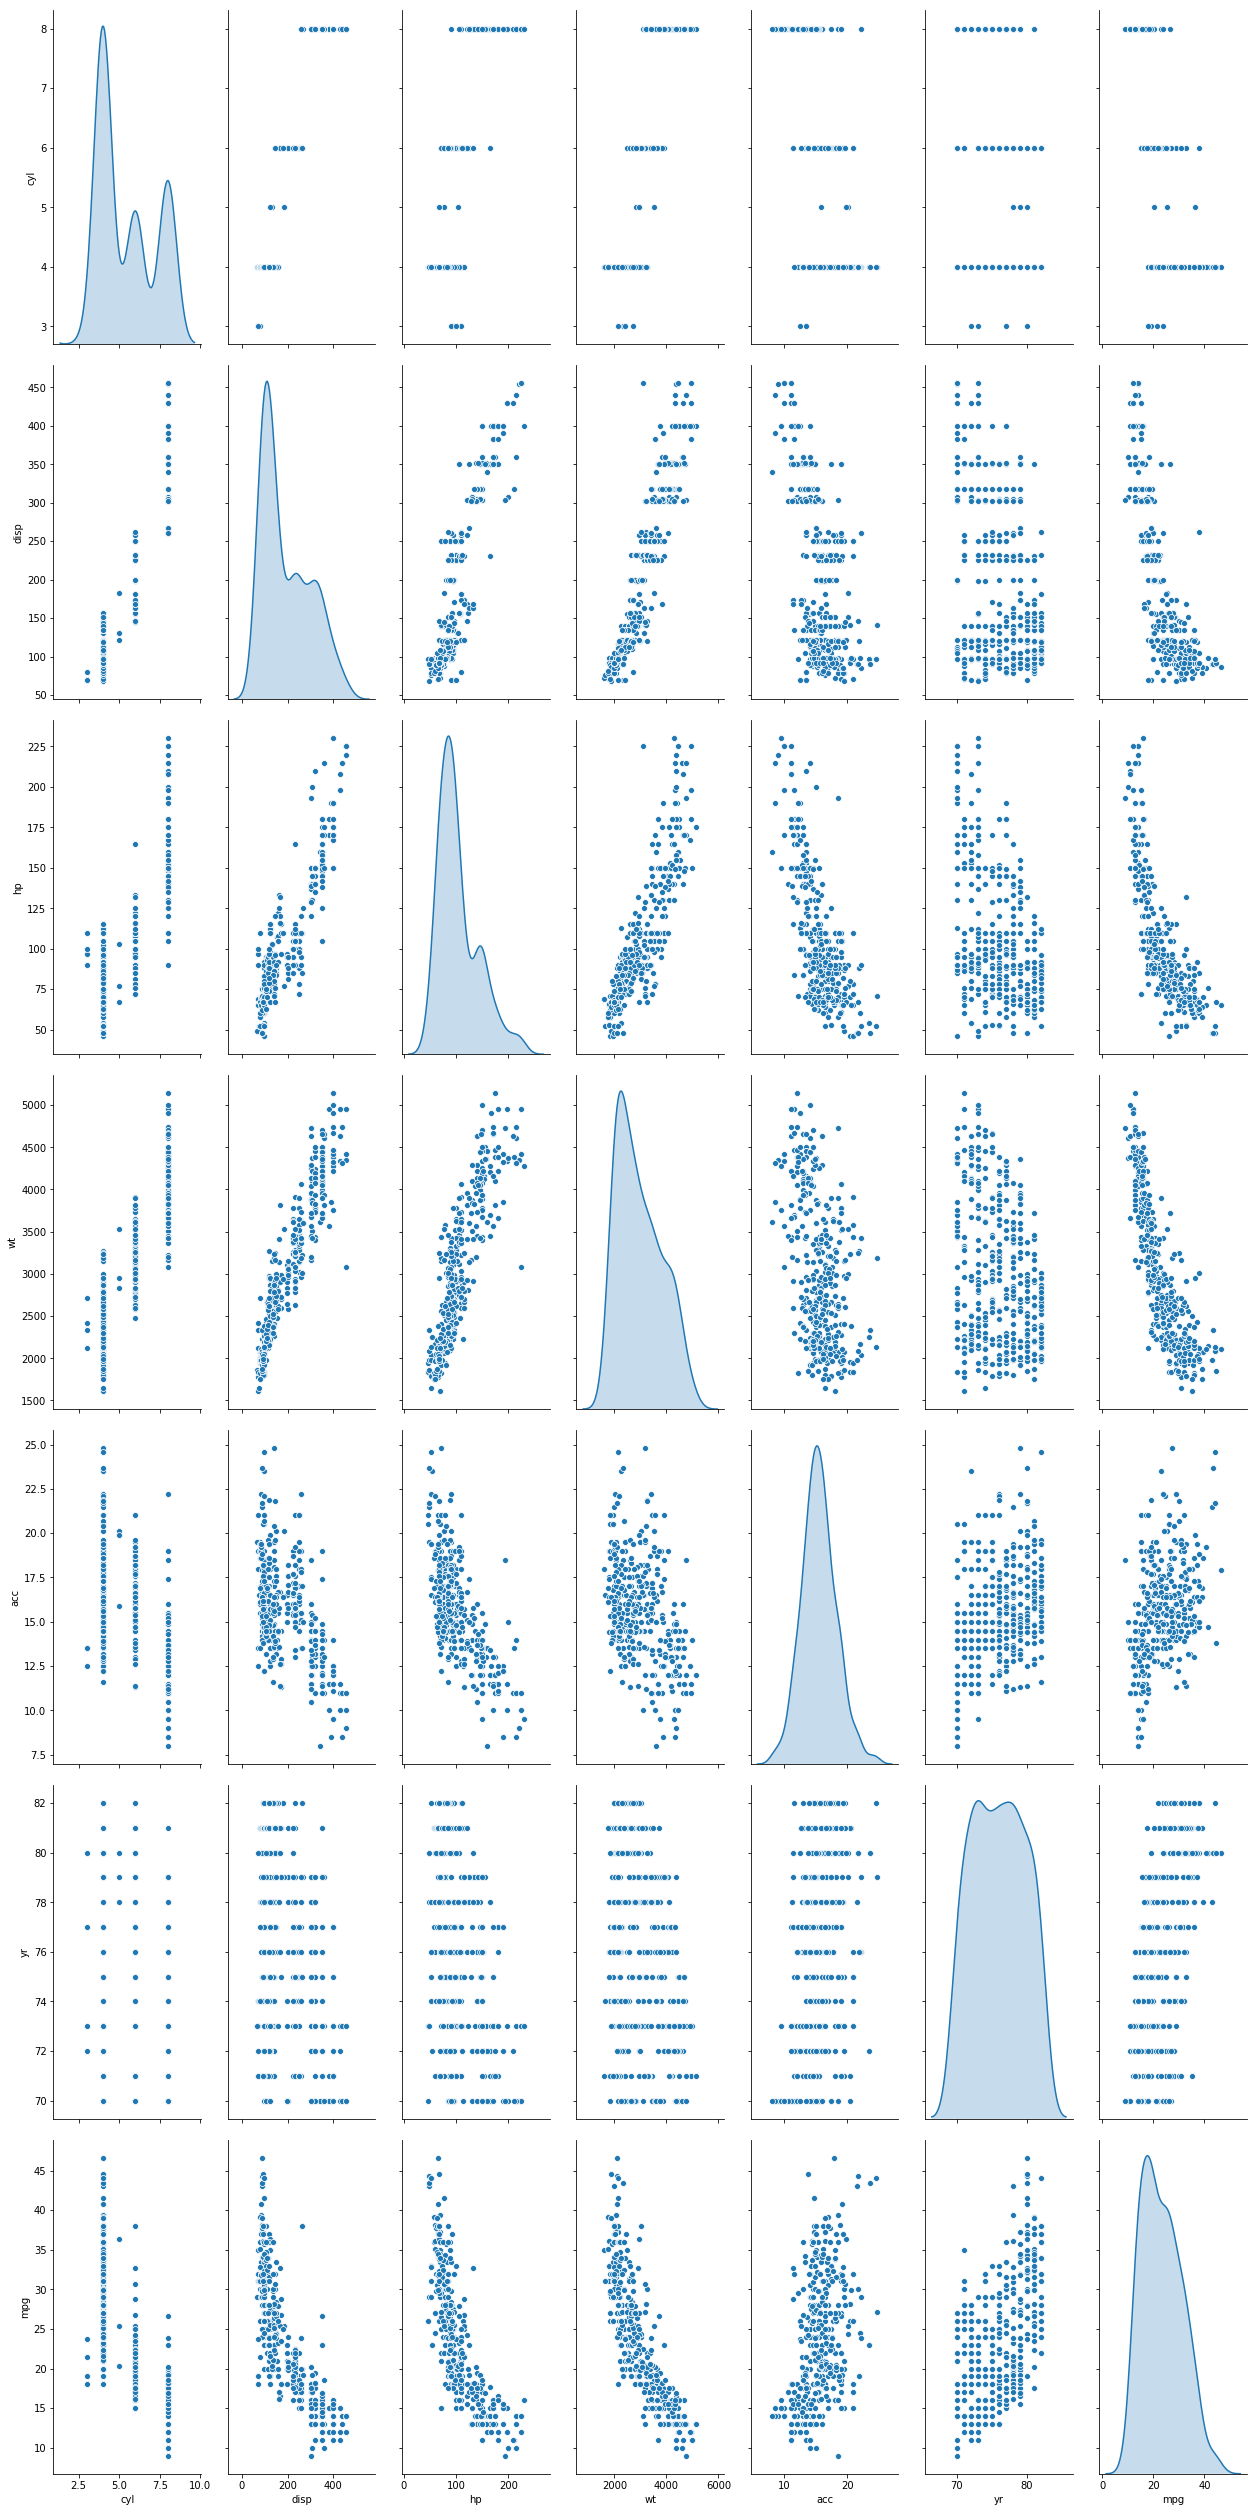

In [13]:
sns.pairplot(df1, height = 5, aspect=0.5 , diag_kind='kde')

The amount of Gaussian curves in the plot indicates that there could be a minimum of 3 clusters in the given dataset

STEP 3 PART 1 - Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters

Perfroming Scaling Operation

In [14]:
##importing class necessary to perform scaling operation
from scipy.stats import zscore

In [15]:
##performing the scaling operation
df2 = df1.apply(zscore) ##using a different dataframe for scaled data for plotting the boxplots
                        ##the unscaled dataframe df2 will be used for bivariate anlysis using scatter plots
df2.head(2)

cyl      disp        hp        wt       acc        yr       mpg
0  1.483947  1.077290  0.664133  0.620540 -1.285258 -1.625315 -0.698638
1  1.483947  1.488732  1.574594  0.843334 -1.466724 -1.625315 -1.083498

Using elbow curve to get an indication about the number of clusters in the given dataset

In [16]:
##creating a list to store distortion values for different values of clusters
distortion =[]

Fitting the Kmeans Model for for 1 to 9 clusters & calculating mean distortions for each

In [17]:
from sklearn.cluster import KMeans
from scipy.spatial import distance
for k in range(1, 10):
    model = KMeans(n_clusters=k).fit(df2)
    distortion.append(sum(np.min(distance.cdist(df2, model.cluster_centers_,'euclidean'), axis=1))/(df2.shape[0]))

In [18]:
##printing the list of mean distortions for 1 to 9 clusters
distortion

[2.4599540277021017,
 1.6934623956814503,
 1.4306047581142727,
 1.2510481571820475,
 1.1911051632370409,
 1.1288644970735913,
 1.0778155370878704,
 1.0375437778186356,
 0.9907237989040149]

Plotting Elbow Curve

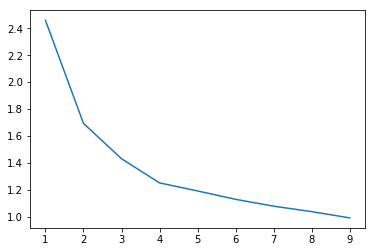

In [19]:
plt.plot(range(1,10), distortion)

From the Elbow Plot, the curve stops a steep drop at K=3. Hence 3 can be considered the optimal value of K. We shall go for k=4 based on the performance of k=3.

Modelling kmeans using 3 clusters

In [20]:
model2=KMeans(n_clusters=3)
model2.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [21]:
##creating labels for each observation
lab = model2.labels_

Appending labels of each observation to the dataframe used for modelling

In [22]:
df2["labels"] = lab 
df2.head(2)

cyl      disp        hp        wt       acc        yr       mpg  \
0  1.483947  1.077290  0.664133  0.620540 -1.285258 -1.625315 -0.698638   
1  1.483947  1.488732  1.574594  0.843334 -1.466724 -1.625315 -1.083498   

   labels  
0       2  
1       2

In [23]:
df1["labels"] = lab
df1.head(2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


cyl   disp   hp    wt   acc  yr   mpg  labels
0    8  307.0  130  3504  12.0  70  18.0       2
1    8  350.0  165  3693  11.5  70  15.0       2

STEP 3 PART 2 - Identifying the Clusters

In [24]:
df2["labels"].unique()

array([2, 0, 1], dtype=int64)

Visualizing the clusters using Boxplots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BF7D9E3240>,
      dtype=object)

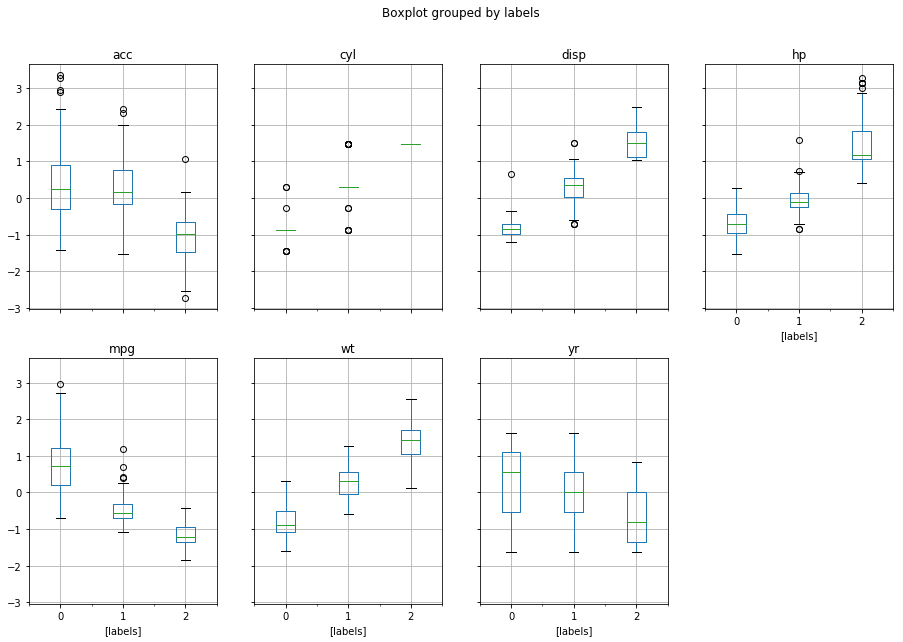

In [25]:
df2.boxplot(by = 'labels', layout=(2,4), figsize=(15, 10))

Inference from the box plots

Group 0 (cluster 1) - heavy weight is clearly the 'super car' segment with larger number of cylinders, highest displacement, horsepower & weight and thereby the best acceleration (least in seconds) & poorest fuel economy. It is also evident that the dataset doesnt contain observations about Group 2 (cluster 3) in the later years of the observation period. 

Group 1 (cluster 2) - medium weight contains the in-between models. They have higher horse power than Group 1(cluster 2) and thus better acceleration times. The higher power comes at the cost of mileage as they are heavier possibly due to the larger number of cylinders when compared with Group 1(cluster 2). These models too have not been represented as well as the Group 1 models during the later part of the observation period. 

Group 2 (cluster 3) - light weight contains the most feul efficient models in the given dataset. However these models are considerably lighter than those in the other groups and are the least powerful among the three groups. The models in this group could be ideal for city driving with moderate to heavy traffic and might be unsuitable for highways or expressways owing to the larger acceleration times & lower weights.

STEP 3 PART 3 - Separating the Clusters

Cluster 1 - heavy weight

In [26]:
clust1_df = df1[df1["labels"] == 0]
clust1_df.shape

(202, 8)

Cluster 2 - Medium weight

In [27]:
clust2_df = df1[df1["labels"] == 1]
clust2_df.shape

(95, 8)

Cluster 3 -Light weight

In [28]:
clust3_df = df1[df1["labels"] == 2]
clust3_df.shape

(95, 8)

STEP 4 PART 1 - Use linear regression model on different clusters separately

In [29]:
##importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Modelling Cluster 1 - Heavy weight

In [30]:
##creating the X & y dataframes
X1 = clust1_df.drop(columns = ["mpg", "labels"])

y1 = clust1_df[['mpg']]

In [31]:
##splitting the data into training and testing sets with a 80:20 split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=1)

In [32]:
##printing the shape of the training set and testing set
print(X1_train.shape)
print(X1_test.shape)

(161, 6)
(41, 6)


In [33]:
##performing the training operation
linreg1 = LinearRegression()
linreg1.fit(X1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Checking Model Accuracy

In [34]:
linreg1.score(X1_train, y1_train)

0.6939868445097135

In [35]:
linreg1.score(X1_test, y1_test)

0.5923797943034843

Modelling Cluster 2 - Medium weight

In [36]:
##creating the X & y dataframes
X2 = clust2_df.drop(columns = ["mpg", "labels"])

y2 = clust2_df[['mpg']]

In [37]:
##splitting the data into training and testing sets with a 80:20 split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=1)

In [38]:
##printing the shape of the training set and testing set
print(X2_train.shape)
print(X2_test.shape)

(76, 6)
(19, 6)


In [39]:
##performing the training operation
linreg2 = LinearRegression()
linreg2.fit(X2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Checking Model Accuracy

In [40]:
linreg2.score(X2_train, y2_train)

0.49101853034069776

In [41]:
linreg2.score(X2_test, y2_test)

0.3362992887794274

Modelling Cluster 3 - Light weight

In [42]:
##creating the X & y dataframes
X3 = clust3_df.drop(columns = ["mpg", "labels"])

y3 = clust3_df[['mpg']]

In [43]:
##splitting the data into training and testing sets with a 80:20 split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=1)

In [44]:
##printing the shape of the training set and testing set
print(X3_train.shape)
print(X3_test.shape)

(76, 6)
(19, 6)


In [45]:
##performing the training operation
linreg3 = LinearRegression()
linreg3.fit(X3_train, y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Checking Model Accuracy

In [46]:
linreg3.score(X3_train, y3_train)

0.6475990659856758

In [47]:
linreg3.score(X3_test, y3_test)

0.16786889072135913

STEP 4 PART 2 - Print the coefficients of the models individually

In [48]:
##creating a dataframe for storing the coefficients of all the 3 models
coeff_df = pd.DataFrame(columns = ["coefficient", "cluster 1 MW", "cluster 2 LW", "cluster 3 HW"])
coeff_df["coefficient"] = X1_train.columns

In [49]:
##estimating the coefficients of all the 3 models & storing them in the dataframe created above
for idx, col_name in enumerate(X1_train.columns):
    coeff_df["cluster 1 MW"][idx] = linreg1.coef_[0][idx]

for idx, col_name in enumerate(X2_train.columns):
    coeff_df["cluster 2 LW"][idx] = linreg2.coef_[0][idx]

for idx, col_name in enumerate(X3_train.columns):
    coeff_df["cluster 3 HW"][idx] = linreg3.coef_[0][idx]

In [50]:
##printing the dataframe of estimated coefficients for all the 3 models
coeff_df

coefficient cluster 1 MW cluster 2 LW cluster 3 HW
0         cyl      8.93999     0.854126            0
1        disp   -0.0682378   -0.0117441   0.00207356
2          hp   -0.0522788   -0.0375443   -0.0296492
3          wt  -0.00448811  -0.00311105  -0.00154746
4         acc  -0.00912691    -0.334831    -0.453505
5          yr     0.885944     0.517946     0.382953


CONCLUSION
Cluster 1 has performed poorly in the linear regression modelling, infact the poorest amongst the three clusters. The difference in the accuracy scores between train & test indicates overfitting. The presense of outliers as evident from the corresponding boxplot above could have led to the possible overfitting. The very low number of observations avaialable for training is also an important reason for the poor perfomance.

Cluster 2 has performed relatively better than cluster 1 in the linear regression modelling although the performance in general is poor. The very low number of observations avaialable for training could be the reason for the poor performance.

Cluster 3 with relatively larger number of observations than the other two clusters has performed best amongst the three clusters.